In [8]:
import os

# directory = "D:\\Code\\AI\\Model\\NumberRecognitionModel"
directory = "/Users/danielnguyen/Repo/AI/Model/numberRecognitionModel"

versions_list = sorted([int(version.replace('version', '')) for version in os.listdir(directory) if version != ".DS_Store"])
latest_version = versions_list[-1]
new_version = latest_version + 1

new_version_folder = 'version{}'.format(new_version)
new_version_path = 'version{}.hdf5'.format(new_version)

path = os.path.join(directory, new_version_folder)

os.makedirs(path)

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

Found 32680 images belonging to 10 classes.
Found 8164 images belonging to 10 classes.


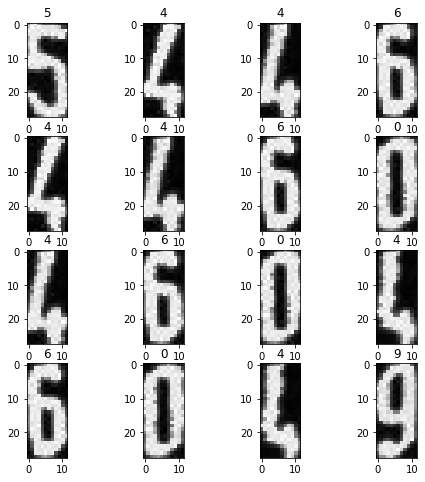

In [10]:
ds = ImageDataGenerator(
    rescale=1.0/255, 
    validation_split=0.2,
    fill_mode='constant',
    cval=0
)

train_ds = ds.flow_from_directory(
    "../numberLabel", 
    target_size=(28,12), 
    batch_size=128,
    subset='training',
    color_mode='grayscale',
    class_mode='sparse'
)

validation_ds = ds.flow_from_directory(
    "../numberLabel", 
    target_size=(28,12), 
    batch_size=128,
    subset='validation',
    color_mode='grayscale',
    class_mode='sparse'
)

input_shape = train_ds[0][0][0].shape

plt.rcParams["figure.figsize"] = (8,8)
fig, axs = plt.subplots(4,4)

for i in range(4):
    for j in range(4):
        axs[i, j].imshow(validation_ds[0][0][i + j], cmap='gray')
        axs[i, j].set_title(int(validation_ds[0][1][i + j]))

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(input_shape),
    tf.keras.layers.Conv2D(16, (3,3), activation='elu',
                        kernel_regularizer=tf.keras.regularizers.l2(1e-3), 
                        padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='elu',
                        kernel_regularizer=tf.keras.regularizers.l2(1e-3), 
                        padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='elu', 
                        kernel_regularizer=tf.keras.regularizers.l2(1e-3), 
                        padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 12, 16)        160       
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 12, 16)        64        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 6, 16)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 6, 32)         4640      
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 6, 32)         128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 3, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 3, 32)         

In [13]:
class stopCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}) :
        if (logs.get('val_accuracy') >= 0.999 and logs.get('accuracy') >= 0.999) :
            print('\nReached 99% accuracy so stopping training')
            self.model.stop_training = True



save_path = os.path.join(path, new_version_path)

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=save_path,
                                                               monitor='val_accuracy',
                                                               mode='max',
                                                               save_best_only=True)

In [14]:
callback = stopCallback()

history = model.fit(train_ds, 
                    epochs=200, 
                    callbacks=[callback, model_checkpoint_callback], 
                    validation_data=validation_ds)

2022-02-21 21:41:10.720611: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 156 of 256
2022-02-21 21:41:15.908967: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Train for 256 steps, validate for 64 steps
Epoch 1/200


2022-02-21 21:41:28.665969: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 199 of 256


  3/256 [..............................] - ETA: 22:16 - loss: 2.5814 - accuracy: 0.1354 

2022-02-21 21:41:31.709534: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


256/256 [==============================] - 38s 149ms/step - loss: 0.2493 - accuracy: 0.9508 - val_loss: 2.3489 - val_accuracy: 0.1218
Epoch 2/200


2022-02-21 21:42:04.376015: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 193 of 256


  3/256 [..............................] - ETA: 19:09 - loss: 0.0746 - accuracy: 0.9974

2022-02-21 21:42:07.764019: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


256/256 [==============================] - 36s 139ms/step - loss: 0.0729 - accuracy: 0.9968 - val_loss: 0.2188 - val_accuracy: 0.9889
Epoch 3/200


2022-02-21 21:42:39.976194: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 192 of 256


  3/256 [..............................] - ETA: 19:16 - loss: 0.0623 - accuracy: 1.0000

2022-02-21 21:42:43.425683: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


256/256 [==============================] - 36s 139ms/step - loss: 0.0646 - accuracy: 0.9978 - val_loss: 0.0626 - val_accuracy: 0.9984
Epoch 4/200


2022-02-21 21:43:15.512579: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 197 of 256


  3/256 [..............................] - ETA: 18:56 - loss: 0.0640 - accuracy: 0.9974

2022-02-21 21:43:18.721464: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


256/256 [==============================] - 36s 140ms/step - loss: 0.0601 - accuracy: 0.9980 - val_loss: 0.0570 - val_accuracy: 0.9988
Epoch 5/200


2022-02-21 21:43:51.300204: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 181 of 256


  2/256 [..............................] - ETA: 31:05 - loss: 0.0529 - accuracy: 1.0000  

2022-02-21 21:43:55.778786: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


256/256 [==============================] - 39s 153ms/step - loss: 0.0564 - accuracy: 0.9984 - val_loss: 0.0540 - val_accuracy: 0.9991
Epoch 6/200


2022-02-21 21:44:30.512718: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 169 of 256


  3/256 [..............................] - ETA: 21:30 - loss: 0.0621 - accuracy: 0.9974 

2022-02-21 21:44:35.538353: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


256/256 [==============================] - 41s 159ms/step - loss: 0.0530 - accuracy: 0.9986 - val_loss: 0.0510 - val_accuracy: 0.9988
Epoch 7/200


2022-02-21 21:45:11.120025: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 170 of 256


  3/256 [..............................] - ETA: 21:35 - loss: 0.0478 - accuracy: 1.0000  

2022-02-21 21:45:16.263141: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


256/256 [==============================] - 40s 155ms/step - loss: 0.0499 - accuracy: 0.9987 - val_loss: 0.0490 - val_accuracy: 0.9990
Epoch 8/200


2022-02-21 21:45:50.689816: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 170 of 256


  2/256 [..............................] - ETA: 32:13 - loss: 0.0438 - accuracy: 1.0000  

2022-02-21 21:45:55.682619: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


256/256 [==============================] - 39s 152ms/step - loss: 0.0468 - accuracy: 0.9988 - val_loss: 0.0459 - val_accuracy: 0.9990
Epoch 9/200


2022-02-21 21:46:29.520493: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 177 of 256


  3/256 [..............................] - ETA: 20:37 - loss: 0.0429 - accuracy: 1.0000 

2022-02-21 21:46:33.945487: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


256/256 [==============================] - 38s 148ms/step - loss: 0.0436 - accuracy: 0.9990 - val_loss: 0.0442 - val_accuracy: 0.9990
Epoch 10/200


2022-02-21 21:47:07.334137: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 178 of 256


  3/256 [..............................] - ETA: 20:33 - loss: 0.0398 - accuracy: 1.0000 

2022-02-21 21:47:11.677527: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


256/256 [==============================] - 38s 148ms/step - loss: 0.0410 - accuracy: 0.9988 - val_loss: 0.0416 - val_accuracy: 0.9991
Epoch 11/200


2022-02-21 21:47:45.156188: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 180 of 256


  3/256 [..............................] - ETA: 20:36 - loss: 0.0367 - accuracy: 1.0000 

2022-02-21 21:47:49.569858: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


256/256 [==============================] - 38s 148ms/step - loss: 0.0383 - accuracy: 0.9990 - val_loss: 0.0393 - val_accuracy: 0.9989
Epoch 12/200


2022-02-21 21:48:23.053736: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 168 of 256


  3/256 [..............................] - ETA: 21:32 - loss: 0.0365 - accuracy: 1.0000 

2022-02-21 21:48:28.121417: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


255/256 [============================>.] - ETA: 0s - loss: 0.0355 - accuracy: 0.9993
Reached 99% accuracy so stopping training
256/256 [==============================] - 39s 151ms/step - loss: 0.0354 - accuracy: 0.9993 - val_loss: 0.0368 - val_accuracy: 0.9990


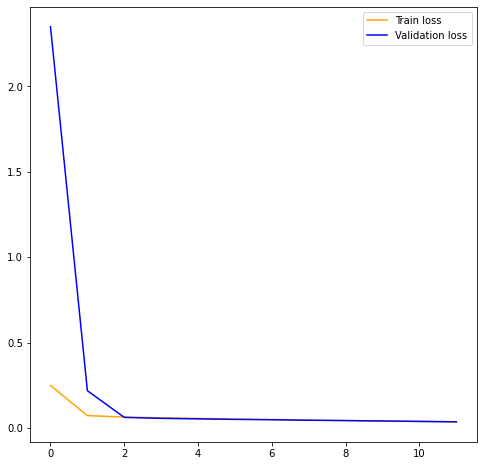

In [15]:
plt.plot(history.history['loss'], color='orange', label='Train loss')
plt.plot(history.history['val_loss'], color='blue', label='Validation loss')
plt.legend()
plt.show()

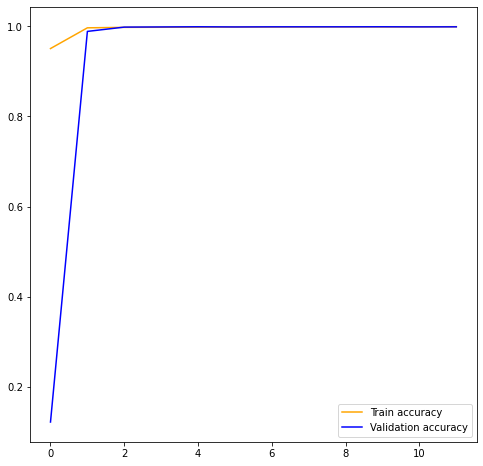

In [16]:
plt.plot(history.history['accuracy'], color='orange', label='Train accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation accuracy')
plt.legend()
plt.show()

# Save the model into Model folder for later usage

In [17]:
%%writefile {path}/model.py

import tensorflow as tf

def create_model() :
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(input_shape),
        tf.keras.layers.Conv2D(16, (3,3), activation='elu',
                            kernel_regularizer=tf.keras.regularizers.l2(1e-3), 
                            padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='elu',
                            kernel_regularizer=tf.keras.regularizers.l2(1e-3), 
                            padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='elu', 
                            kernel_regularizer=tf.keras.regularizers.l2(1e-3), 
                            padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    return model

Writing /Users/danielnguyen/Repo/AI/Model/numberRecognitionModel/version11\model.py
